## Word Cloud based on news scrapped on elderly well being

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import nltk, re, string, collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image

In [2]:
df = pd.read_csv("sentimentanalysis_final.csv")

### Common data preprocessing steps on all text:

* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

In [3]:
# Apply a first round of text cleaning techniques

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [4]:
df['clean'] = df.clean.apply(round1)

In [ ]:
df

links         dates  \
0     https://www.vancouverislandfreedaily.com/news/...  Feb 16, 2022   
1     https://www.vancouverislandfreedaily.com/news/...  Feb 14, 2022   
2     https://www.vancouverislandfreedaily.com/commu...  Feb 14, 2022   
3     https://www.vancouverislandfreedaily.com/news/...  Feb 11, 2022   
4     https://www.vancouverislandfreedaily.com/news/...   Feb 9, 2022   
...                                                 ...           ...   
1202  https://www.nanaimobulletin.com/business/store...  Mar 17, 2020   
1203  https://www.nanaimobulletin.com/news/berwick-r...   Mar 5, 2020   
1204  https://www.nanaimobulletin.com/opinion/letter...   Mar 2, 2020   
1205  https://www.nanaimobulletin.com/sports/registr...  Feb 16, 2020   
1206  https://www.nanaimobulletin.com/news/b-c-ndp-t...  Oct 28, 2017   

                                                 header  \
0     Volunteers who supported seniors a lasting leg...   
1     GIS one-time payment coming earlier for affect...   
2     Inspired by crafts with grandma, Victoria stud...   
3     Lack of heat in husband’s care home has Kelown...   
4     A positive outlook on getting old could help w...   
...                                                 ...   
1202  Stores dedicate early hours to seniors, health...   
1203  Berwick retirement community construction to g...   
1204  LETTER TO THE EDITOR: Province should scrutini...   
1205  Registration opens soon for BC 55+ Games in Ri...   
1206  NDP’s Adrian Dix tackles seniors’ residential ...   

                                                   body  \
0     The advocate for seniors in British Columbia s...   
1     Help is on the way for seniors affected by the...   
2     This Valentine’s Day marks the fifth tie a loc...   
3     Lynn Fanelli of Lake Country is angry.Angry th...   
4     It turns out the old adage “you’re only as old...   
...                                                 ...   
1202  Seniors and vulnerable citizens will soon be a...   
1203  A new retirement community is set to be comple...   
1204  To the editor,Re:For-profit senior care homes ...   
1205  That gold medal you’ve dreamed about could be ...   
1206  Health Minister Adrian Dix says he needs to fi...   

                                                  clean b_points  
0     the advocate for seniors in british columbia s...      NaN  
1     help is on the way for seniors affected by the...      NaN  
2     this valentine’s day marks the fifth tie a loc...      NaN  
3     lynn fanelli of lake country is angryangry tha...      NaN  
4     it turns out the old adage “you’re only as old...      NaN  
...                                                 ...      ...  
1202  seniors and vulnerable citizens will soon be a...      NaN  
1203  a new retirement community is set to be comple...      NaN  
1204  to the editorreforprofit senior care homes spe...      NaN  
1205  that gold medal you’ve dreamed about could be ...      NaN  
1206  health minister adrian dix says he needs to fi...      NaN  

[1207 rows x 6 columns]

In [5]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [6]:
df['clean'] = df.clean.apply(round2)
df

Unnamed: 0                                              links  \
0            232  https://www.aarpethel.com/ageism/im-71-and-i-s...   
1            236  https://www.aarpethel.com/ageism/judged-becaus...   
2            237  https://www.aarpethel.com/ageism/age-discrimin...   
3            238  https://www.aarpethel.com/health/3-things-you-...   
4            239  https://www.aarpethel.com/fulfillment/making-t...   
...          ...                                                ...   
1088         213  https://www.vancouverislandfreedaily.com/news/...   
1089         215  https://www.vancouverislandfreedaily.com/news/...   
1090         217  https://www.vancouverislandfreedaily.com/news/...   
1091         218  https://www.vancouverislandfreedaily.com/news/...   
1092         226  https://www.vancouverislandfreedaily.com/life/...   

           dates                                             header  \
0     15-09-2020                   I’m 71 and I Still Remember Lust   
1     29-06-2020                   Don't Judge Me Because of My Age   
2     29-06-2020           Learn the Language of Age Discrimination   
3     21-02-2022     3 Things You Should Know About Iron as You Age   
4     25-01-2021            Making the Case for Aging Disgracefully   
...          ...                                                ...   
1088  01-11-2019  National Silver Alerts for missing persons wit...   
1089  30-03-2019  Vancouver Island group offers free, fun ‘trish...   
1090  18-02-2019  Greater Victoria is a tough market, even for f...   
1091  15-02-2019  ‘Two chicks by the sea’ saved by their guardia...   
1092  24-03-2018                               Staying buff over 80   

                                                   body b_points  \
0     The last time I went to physical therapy, to t...      NaN   
1     You don't make progress by standing on the sid...      NaN   
2     When people think of age discrimination, they ...      NaN   
3     No doubt you remember what you learned about i...      NaN   
4     My favorite aunt lived well into her 90s, and ...      NaN   
...                                                 ...      ...   
1088  Canada currently has no national approach for ...      NaN   
1089  A community group is offering free “trishaw” r...      NaN   
1090  Susan Skidmore is moving to Oak Bay from the K...      NaN   
1091  Sisters, known as the “two chicks by the sea,”...      NaN   
1092  ANNA JAMESVICTORIA NEWSAt 5:30 a.m. the downto...      NaN   

                                                  clean  \
0     the last time i went to physical therapy to tr...   
1     you dont make progress by standing on the side...   
2     when people think of age discrimination they u...   
3     no doubt you remember what you learned about i...   
4     my favorite aunt lived well into her  and when...   
...                                                 ...   
1088  canada currently has no national approach for ...   
1089  a community group is offering free trishaw rid...   
1090  susan skidmore is moving to oak bay from the k...   
1091  sisters known as the two chicks by the sea fac...   
1092  anna jamesvictoria newsat  am the downtown vic...   

                              website  polarity  
0                  AARPEthel_articles  0.057339  
1                  AARPEthel_articles  0.076386  
2                  AARPEthel_articles  0.006018  
3                  AARPEthel_articles  0.200068  
4                  AARPEthel_articles  0.058899  
...                               ...       ...  
1088  seniors_vancouverisland_seniors -0.007201  
1089  seniors_vancouverisland_seniors  0.111907  
1090  seniors_vancouverisland_seniors  0.098445  
1091  seniors_vancouverisland_seniors  0.152945  
1092  seniors_vancouverisland_seniors  0.206111  

[1093 rows x 9 columns]

In [7]:
# Rechecking for stopwords
#frequency of words in the entire df['clean']
corpus = " ".join(df['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

In [8]:
ngramFreq.most_common(200)

[(('the',), 27048),
 (('and',), 22146),
 (('to',), 20654),
 (('of',), 17520),
 (('a',), 12696),
 (('in',), 11532),
 (('for',), 9104),
 (('is',), 6752),
 (('with',), 6465),
 (('that',), 6128),
 (('are',), 5287),
 (('housing',), 5231),
 (('as',), 4097),
 (('on',), 4091),
 (('or',), 4073),
 (('people',), 3937),
 (('i',), 3655),
 (('be',), 3507),
 (('this',), 3188),
 (('have',), 3176),
 (('it',), 2874),
 (('at',), 2849),
 (('their',), 2832),
 (('will',), 2781),
 (('homes',), 2765),
 (('we',), 2710),
 (('you',), 2616),
 (('can',), 2597),
 (('more',), 2593),
 (('seniors',), 2172),
 (('by',), 2153),
 (('our',), 2148),
 (('my',), 2133),
 (('who',), 2090),
 (('new',), 2074),
 (('your',), 2028),
 (('they',), 2023),
 (('from',), 2008),
 (('was',), 1968),
 (('not',), 1937),
 (('health',), 1934),
 (('an',), 1886),
 (('care',), 1846),
 (('bc',), 1820),
 (('older',), 1736),
 (('about',), 1716),
 (('affordable',), 1666),
 (('community',), 1647),
 (('but',), 1628),
 (('these',), 1515),
 (('all',), 1493

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
#Adding the unwanted words into the stopwords list.
stop_words = stopwords.words('english')
stop_words.extend(['the',
'and',
'to', 
'of', 
'a', 
'in',
'for', 
'is', 
'with',
'that', 
'are', 
'as', 
'on', 
'or', 
'i', 
'be', 
'have', 
'this', 
'at', 
'it', 
'their', 
'will', 
'we', 
'more', 
'you', 
'can', 
'by', 
'who', 
'they', 
'our', 
'was', 
'from', 
'my', 
'new', 
'not', 
'your',
'an', 
'about', 
'but', 
'said', 
'all', 
'these', 
'has', 
'when', 
'also', 
'were', 
'one', 
'than', 
'–',
'may', 
'need',
'if', 
'her',
'there', 
'some', 
'she', 
'been', 
'other', 
'which', 
'its', 
'those', 
'many', 
'what', 
'so', 
'up', 
'do', 
'them', 
'how', 
'years', 
'us', 
'over', 
'had', 
'most', 
'no', 
'he', 
'between', 
'me', 
'such', 
'through', 
'—', 
'into', 
'including', 
'get', 
'would', 
'two', 
'while', 
'very', 
'where', 
'his', 
'only', 
'because', 
'often', 
'units', 
'could', 
'dont', 
'year', 
'during', 
'way', 
'want', 
'any', 
'says', 
'per', 
'example', 
'still', 
'see', 
'should', 
'number', 
'own'])

In [11]:
clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)

In [12]:
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

In [13]:
BigramnonstopFreq.most_common(200)

[(('housing',), 5231),
 (('people',), 3937),
 (('homes',), 2765),
 (('seniors',), 2172),
 (('health',), 1934),
 (('care',), 1846),
 (('bc',), 1820),
 (('older',), 1736),
 (('affordable',), 1666),
 (('community',), 1647),
 (('help',), 1399),
 (('support',), 1194),
 (('province',), 1107),
 (('adults',), 1043),
 (('services',), 1038),
 (('home',), 1031),
 (('building',), 921),
 (('like',), 911),
 (('social',), 899),
 (('project',), 881),
 (('needs',), 839),
 (('time',), 820),
 (('provide',), 801),
 (('residents',), 801),
 (('age',), 776),
 (('life',), 770),
 (('risk',), 767),
 (('women',), 751),
 (('well',), 733),
 (('living',), 729),
 (('make',), 726),
 (('society',), 726),
 (('government',), 691),
 (('incomes',), 687),
 (('place',), 683),
 (('homelessness',), 681),
 (('work',), 674),
 (('families',), 662),
 (('first',), 651),
 (('city',), 648),
 (('studies',), 602),
 (('find',), 596),
 (('part',), 591),
 (('learn',), 583),
 (('family',), 572),
 (('experiencing',), 567),
 (('review',), 5

Source: word cloud
https://towardsdatascience.com/how-to-easily-make-beautiful-wordclouds-in-python-55789102f6f5  
https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc

In [ ]:
# image mask for wordcloud
#char_mask = np.array(Image.open("image.jpg"))  
#image_colors = ImageColorGenerator(char_mask)
text_l = BigramnonstopFreq.most_common(100) #list full of tuples (word, freq)

In [ ]:
#lets unpack tuple to extract words
list1, list2 = zip(*text_l)
list1

(('housing',),
 ('people',),
 ('homes',),
 ('seniors',),
 ('care',),
 ('health',),
 ('bc',),
 ('older',),
 ('community',),
 ('affordable',),
 ('help',),
 ('support',),
 ('home',),
 ('province',),
 ('services',),
 ('adults',),
 ('residents',),
 ('like',),
 ('social',),
 ('building',),
 ('time',),
 ('project',),
 ('needs',),
 ('age',),
 ('provide',),
 ('life',),
 ('risk',),
 ('living',),
 ('make',),
 ('well',),
 ('women',),
 ('government',),
 ('first',),
 ('society',),
 ('work',),
 ('place',),
 ('families',),
 ('incomes',),
 ('homelessness',),
 ('city',),
 ('family',),
 ('part',),
 ('find',),
 ('studies',),
 ('even',),
 ('use',),
 ('working',),
 ('day',),
 ('safe',),
 ('learn',),
 ('live',),
 ('longterm',),
 ('review',),
 ('experiencing',),
 ('british',),
 ('research',),
 ('good',),
 ('municipal',),
 ('information',),
 ('supportive',),
 ('take',),
 ('staff',),
 ('rental',),
 ('low',),
 ('abuse',),
 ('available',),
 ('know',),
 ('programs',),
 ('important',),
 ('affairs',),
 ('exercise',)

In [ ]:
#list1 - list of words we want but has characters like \( \) \,
#clean the list
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w

In [ ]:
text

' housing people homes seniors care health bc older community affordable help support home province services adults residents like social building time project needs age provide life risk living make well women government first society work place families incomes homelessness city family part find studies even use working day safe learn live longterm review experiencing british research good municipal information supportive take staff rental low abuse available know programs important affairs exercise canada physical build access approximately projects others around supports better vancouver hearing increase construction development found include media taking minister improve less report long three children benefits includes communities'

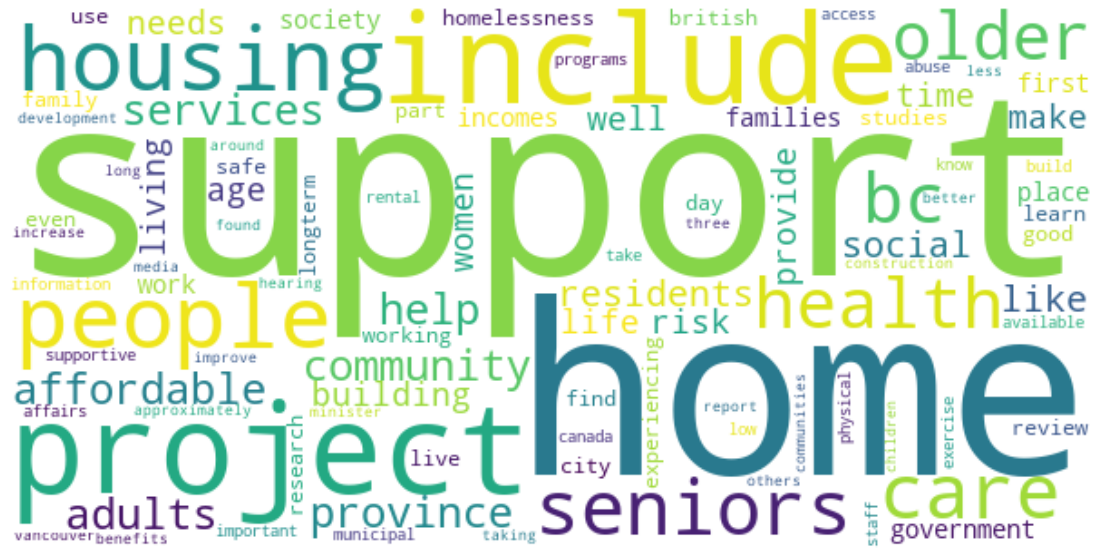

In [ ]:
# create a wordcloud

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)


# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()


In [ ]:
wc.to_file("worclcloud_news.png")

In [14]:
df.groupby('website').count()['clean']

website
AARPEthel_articles                 160
bchousing_news                     276
helpage_news                        40
mcmaster_blog_posts                376
seniors_advocate_bc_news            58
seniors_advocate_bc_reports         19
seniors_first_bc_news               39
seniors_nanaimo_news                52
seniors_vancouverisland_seniors     73
Name: clean, dtype: int64

In [15]:
df_AARPEthel = df[df['website'] == 'AARPEthel_articles']
df_bchousing = df[df['website'] == 'bchousing_news']
df_helpage = df[df['website'] == 'helpage_news']
df_mcmaster = df[df['website'] == 'mcmaster_blog_posts']
df_seniors_advocate_bc_news = df[df['website'] == 'seniors_advocate_bc_news']
df_seniors_advocate_bc_reports = df[df['website'] == 'seniors_advocate_bc_reports']
df_seniors_first_bc_news = df[df['website'] == 'seniors_first_bc_news']
df_seniors_nanaimo_news = df[df['website'] == 'seniors_nanaimo_news']
df_seniors_vancouverisland_seniors = df[df['website'] == 'seniors_vancouverisland_seniors']

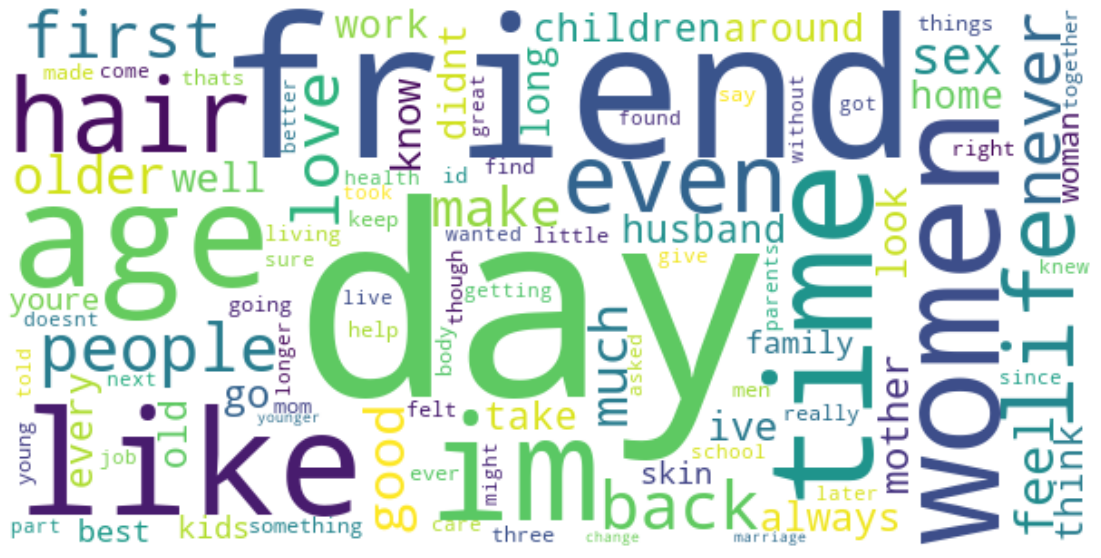

In [16]:
# df_AARPEthel
corpus = " ".join(df_AARPEthel['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_news_AARP.png")

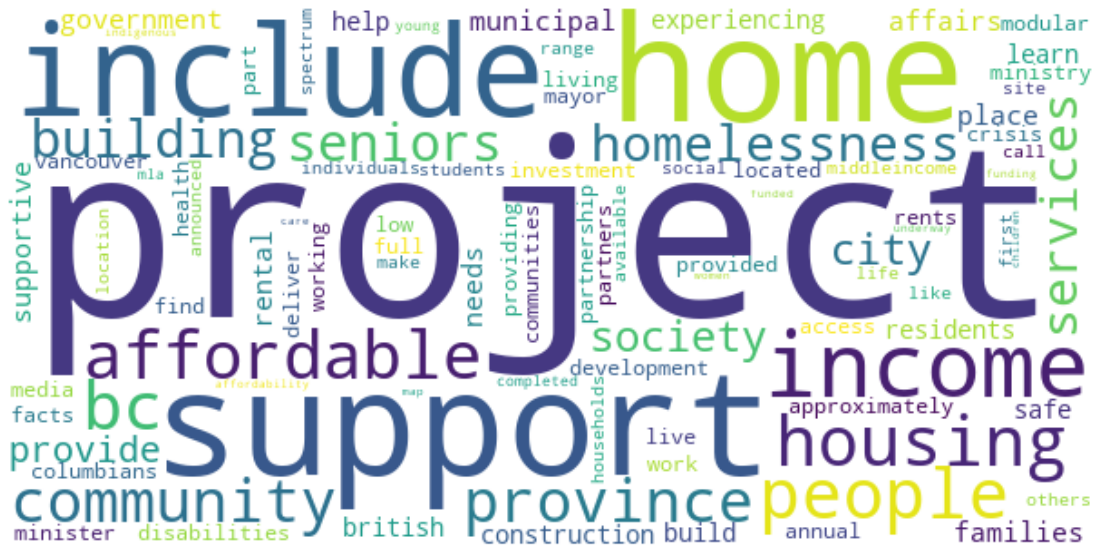

In [17]:
# df_bchousing
corpus = " ".join(df_bchousing['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_bchousing.png")

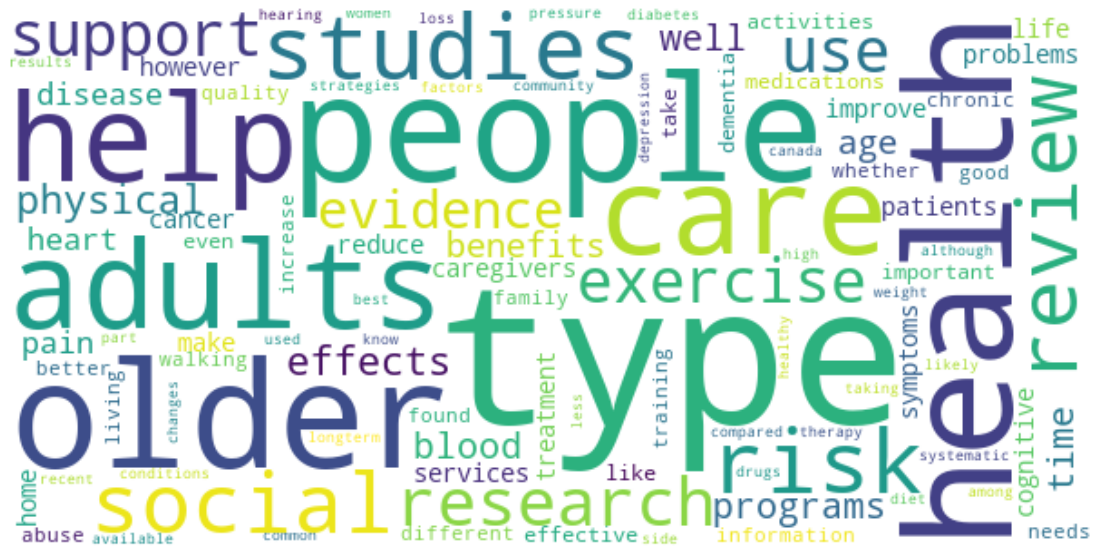

In [18]:
# df_mcmaster
corpus = " ".join(df_mcmaster['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_mcmaster.png")

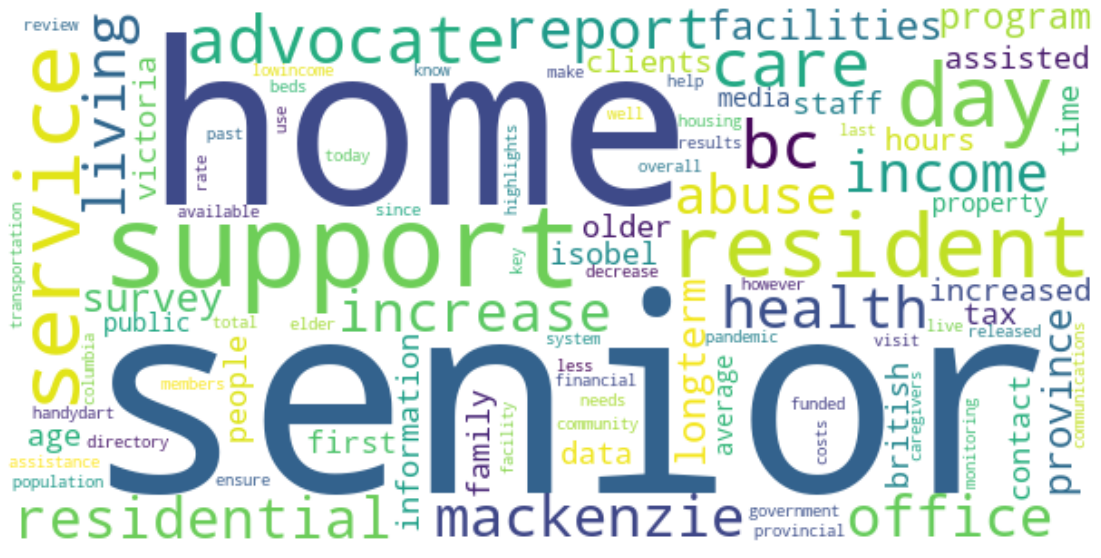

In [20]:
# df_seniors_advocate_bc_news
corpus = " ".join(df_seniors_advocate_bc_news['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_seniors_advocate_bc_news.png")

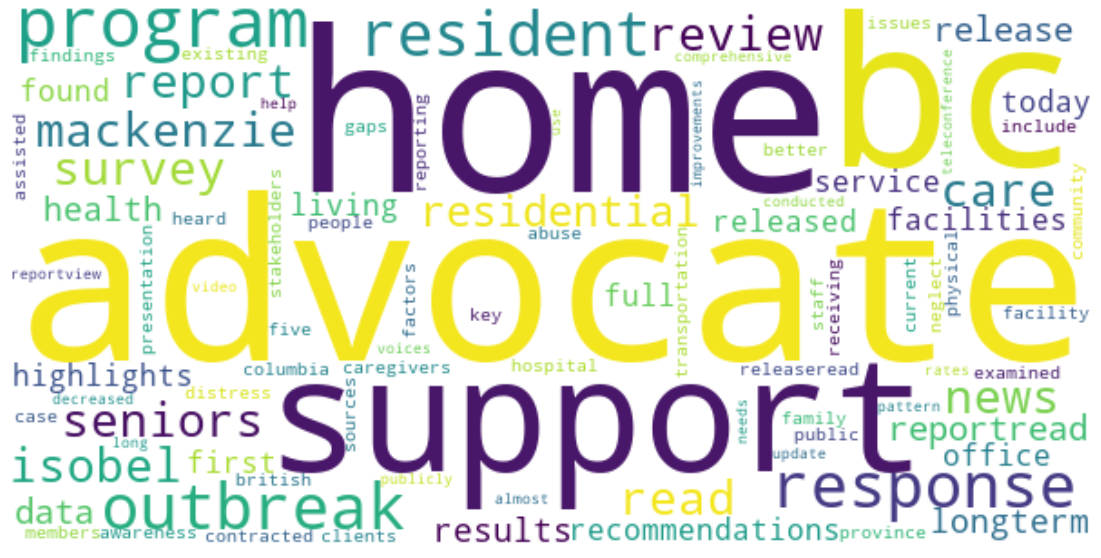

In [21]:
# df_seniors_advocate_bc_reports
corpus = " ".join(df_seniors_advocate_bc_reports['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_seniors_advocate_bc_reports.png")

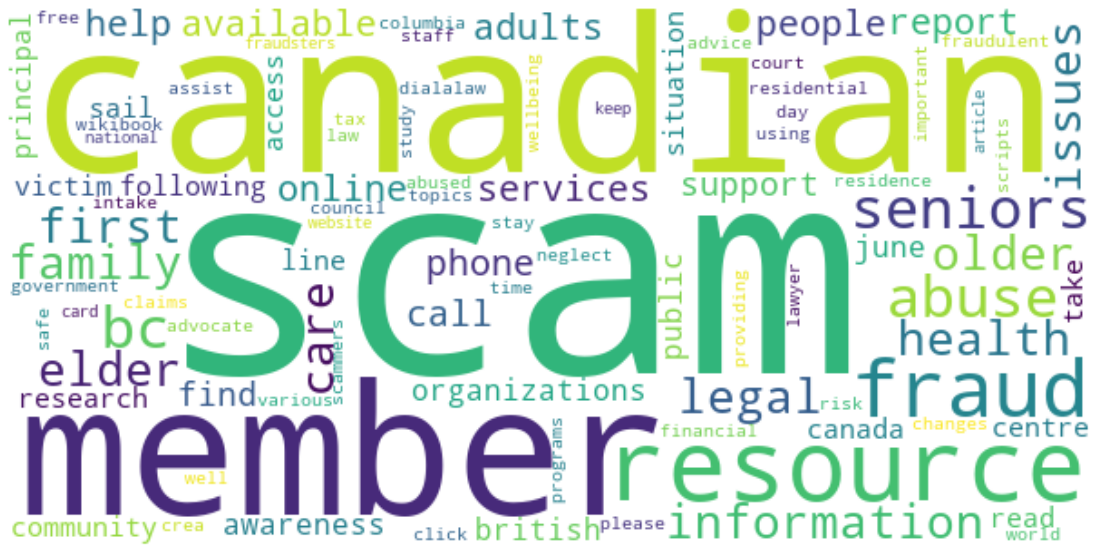

In [22]:
#df_seniors_first_bc_news
corpus = " ".join(df_seniors_first_bc_news['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_seniors_first_bc_news.png")

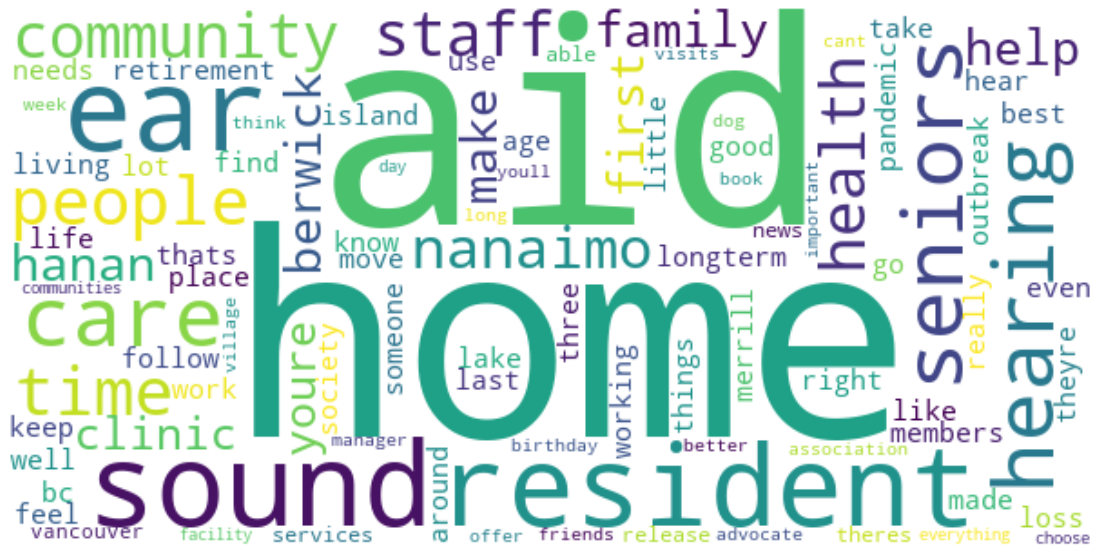

In [23]:
#df_seniors_nanaimo_news
corpus = " ".join(df_seniors_nanaimo_news['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_seniors_nanaimo_news.png")

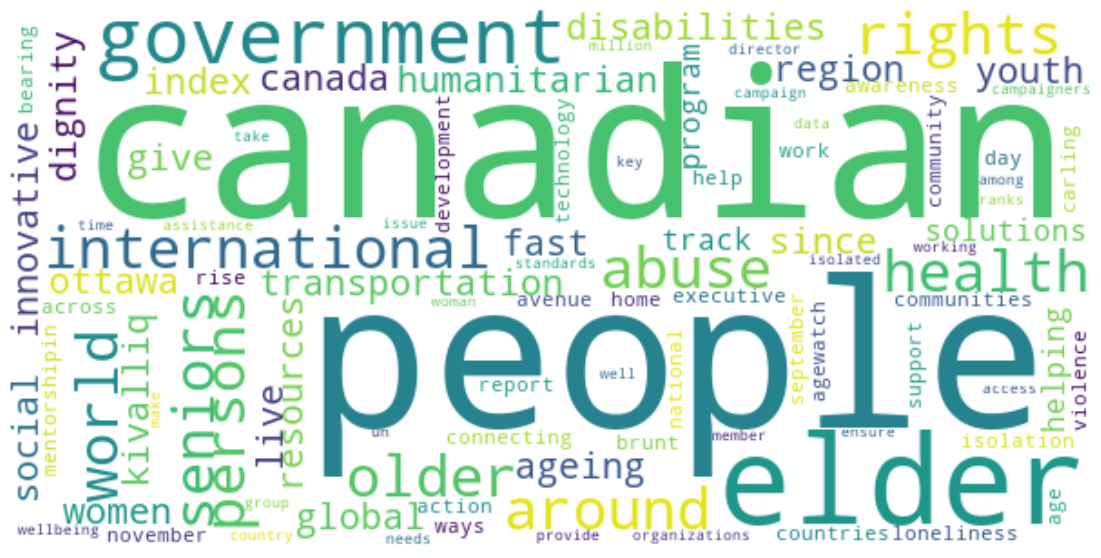

In [24]:
#df_helpage
corpus = " ".join(df_helpage['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_helpage_news.png")

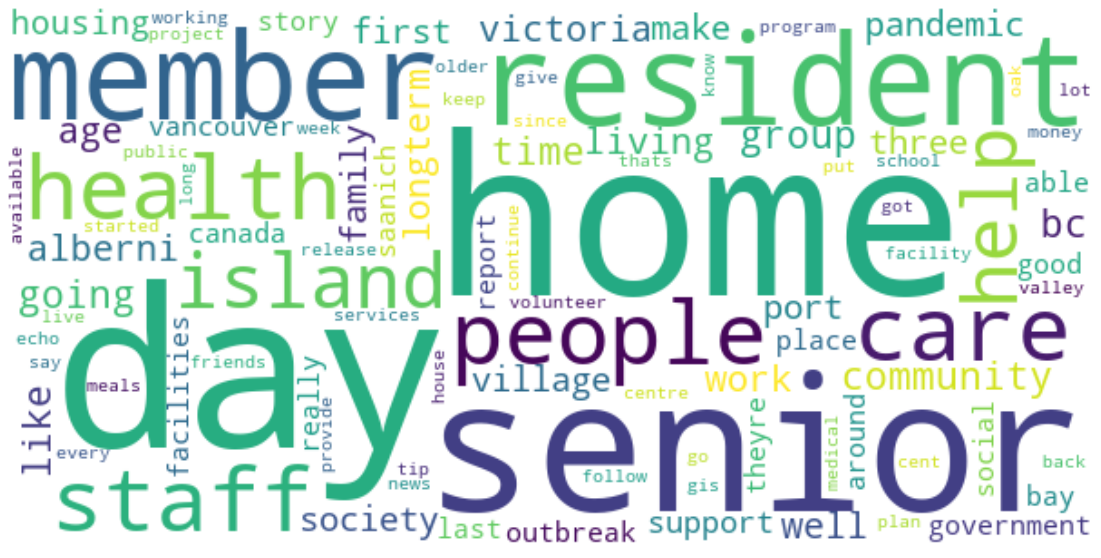

In [25]:
#df_seniors_vancouverisland_seniors

corpus = " ".join(df_seniors_vancouverisland_seniors['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

wc.to_file("worclcloud_vancouverisland_seniors.png")